**monthly commodity prices,** It is available by the World Bank in its so-called "pink sheet." These data are potentially useful for applications on data gathering, inflation adjustments, indexing, cointegration, and general economic riff-raff and so more


1. What is the maximum price of Robusta coffee ?
2. What is the 75th percentile of sugar prices in the European Union (EU)?
3. What is the skewness of the price distribution for Arabica coffee?
4. Is the distribution of sugar prices in the US significantly different from a normal distributio
5. How many times does the price of Dubai oil exceed the price of Brent oil by a certain
threshold $10 ?
6. What is the overall price trend for each commodity ?
7. Which commodity experienced the highest price fluctuations during the observed period?
8. How has brent oil prices vary on a quarterly basis since the last five year
9. Is there a correlation between global sugar prices and the prices of EU sugar and US sugar?
10. Is there a significant difference in the distribution of sugar prices between Europe (EU) a
the United States (US)?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("DataSet - Commodity_Prices.csv")

In [3]:
df.sample(5)

,Unnamed: 0,date,oil_brent,oil_dubai,coffee_arabica,coffee_robustas,tea_columbo,tea_kolkata,tea_mombasa,sugar_eu,sugar_us,sugar_world
436,437,1996-05-01,19.120000,16.990000,2.849900,2.010600,1.839466,1.915514,1.425000,0.679700,0.498000,0.251100
648,649,2014-01-01,107.420000,104.010000,2.926192,1.934113,3.899035,2.161665,2.562500,0.444846,0.446876,0.344582
722,723,2020-03-01,32.980000,33.750000,3.270113,1.487237,3.080000,1.327757,1.994000,0.361306,0.597232,0.260807
514,515,2002-11-01,24.184762,23.159524,1.540400,0.835800,1.536700,1.515400,1.515000,0.575119,0.491600,0.172600
205,206,1977-02-01,12.500000,12.500000,5.411900,5.431397,1.695557,1.905130,2.078425,0.298285,0.243831,0.189400


In [4]:
df.shape

(756, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       756 non-null    int64  
 1   date             756 non-null    object 
 2   oil_brent        756 non-null    float64
 3   oil_dubai        756 non-null    float64
 4   coffee_arabica   756 non-null    float64
 5   coffee_robustas  756 non-null    float64
 6   tea_columbo      756 non-null    float64
 7   tea_kolkata      756 non-null    float64
 8   tea_mombasa      756 non-null    float64
 9   sugar_eu         756 non-null    float64
 10  sugar_us         756 non-null    float64
 11  sugar_world      756 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 71.0+ KB


#### Observation 
- After apply info() function we get the idea about the data
  1. There is no use of Unnamed: 0 bz we have already index values
  2. There is not null_value and we have 756 rows
  3. And date has object data-type and otherAll float64 data-type
  5. In our data, the price value already normalized


### 1.What is the maximum price of Robusta coffee ?

In [6]:
df['coffee_robustas'].max()

6.883547

#### Observation
max()
- max() function is use for get the maximum value in our data
- In the Coffee_Robustas column, there is only 6.883547 maximum price available

0.56951937998
count    756.000000
mean       0.405158
std        0.187741
min        0.112215
25%        0.298120
50%        0.402343
75%        0.569519
max        0.783171
Name: sugar_eu, dtype: float64


<Axes: >

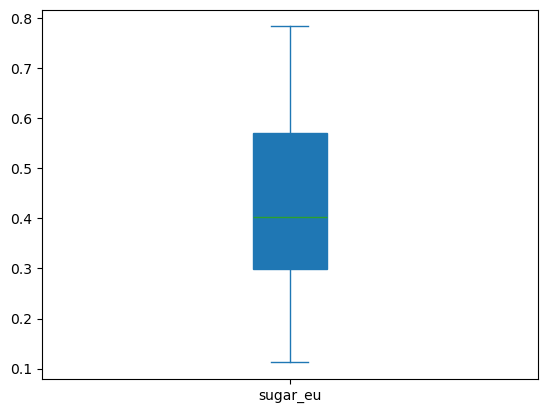

In [7]:
#2. What is the 75th percentile of sugar prices in the European Union (EU)?
print(df['sugar_eu'].quantile(.75))

print(df['sugar_eu'].describe())

df['sugar_eu'].plot(kind='box',patch_artist=True)

#### Observation
- quantile() function is used for get the percentile values
- And we got 0.56951937998 this value.It means in our data there are no outliers 

### 3. What is the skewness of the price distribution for Arabica coffee?

0.5903976942861767


<Axes: ylabel='Density'>

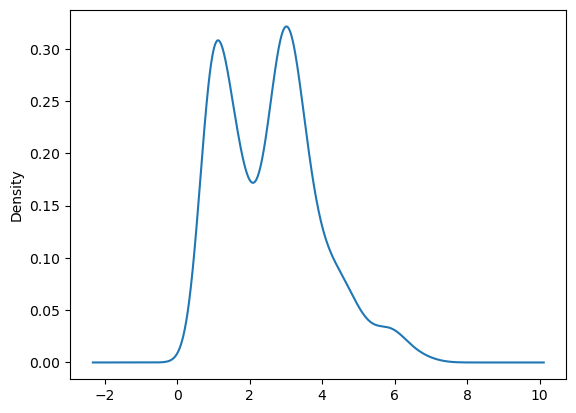

In [8]:
print(df['coffee_arabica'].skew())
df['coffee_arabica'].plot(kind='kde')

### 4. Is the distribution of sugar prices in the US significantly different from a normal distributio

0.10340297222720043


<Axes: ylabel='Density'>

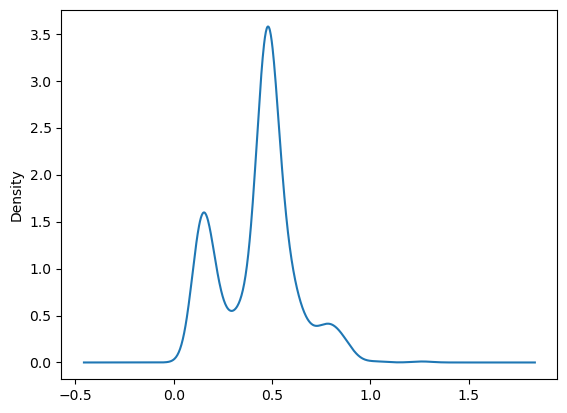

In [9]:
print(df['sugar_us'].skew())
df['sugar_us'].plot(kind='kde')

#### Observation
- Yeah, But it is little bit different from normal distribution
- Using skew() function we get the idea that our sugar_eu is near the normal distribution
- The value of our skew function is 0.10340297222720043

### 6. What is the overall price trend for each commodity ?

In [10]:
v1 = df.drop(columns=['Unnamed: 0','date']).max()
v1

oil_brent          133.873043
oil_dubai          131.224783
coffee_arabica       7.003600
coffee_robustas      6.883547
tea_columbo          4.490000
tea_kolkata          4.073011
tea_mombasa          3.392500
sugar_eu             0.783171
sugar_us             1.263247
sugar_world          1.237700
dtype: float64

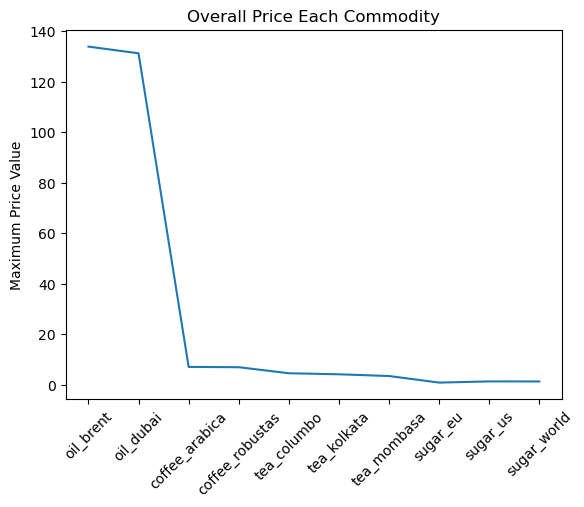

In [11]:
sns.lineplot(data=v1)
plt.xticks(rotation=45)
plt.title("Overall Price Each Commodity")
plt.ylabel('Maximum Price Value')
plt.show()

#### Observation
- After seeing this graph we can say that 
- Oil_brent and oil_dubai both have high price
- And Coffee_arabica to sugar_world have kind of similar price

### 7. Which commodity experienced the highest price fluctuations during the observed period?


In [26]:
df['Date'] = pd.to_datetime(df['date'])
df['month'] = df['Date'].dt.month_name()
df['year'] = df['Date'].dt.year

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       756 non-null    int64         
 1   date             756 non-null    object        
 2   oil_brent        756 non-null    float64       
 3   oil_dubai        756 non-null    float64       
 4   coffee_arabica   756 non-null    float64       
 5   coffee_robustas  756 non-null    float64       
 6   tea_columbo      756 non-null    float64       
 7   tea_kolkata      756 non-null    float64       
 8   tea_mombasa      756 non-null    float64       
 9   sugar_eu         756 non-null    float64       
 10  sugar_us         756 non-null    float64       
 11  sugar_world      756 non-null    float64       
 12  Date             756 non-null    datetime64[ns]
 13  month            756 non-null    object        
 14  year             756 non-null    int32    

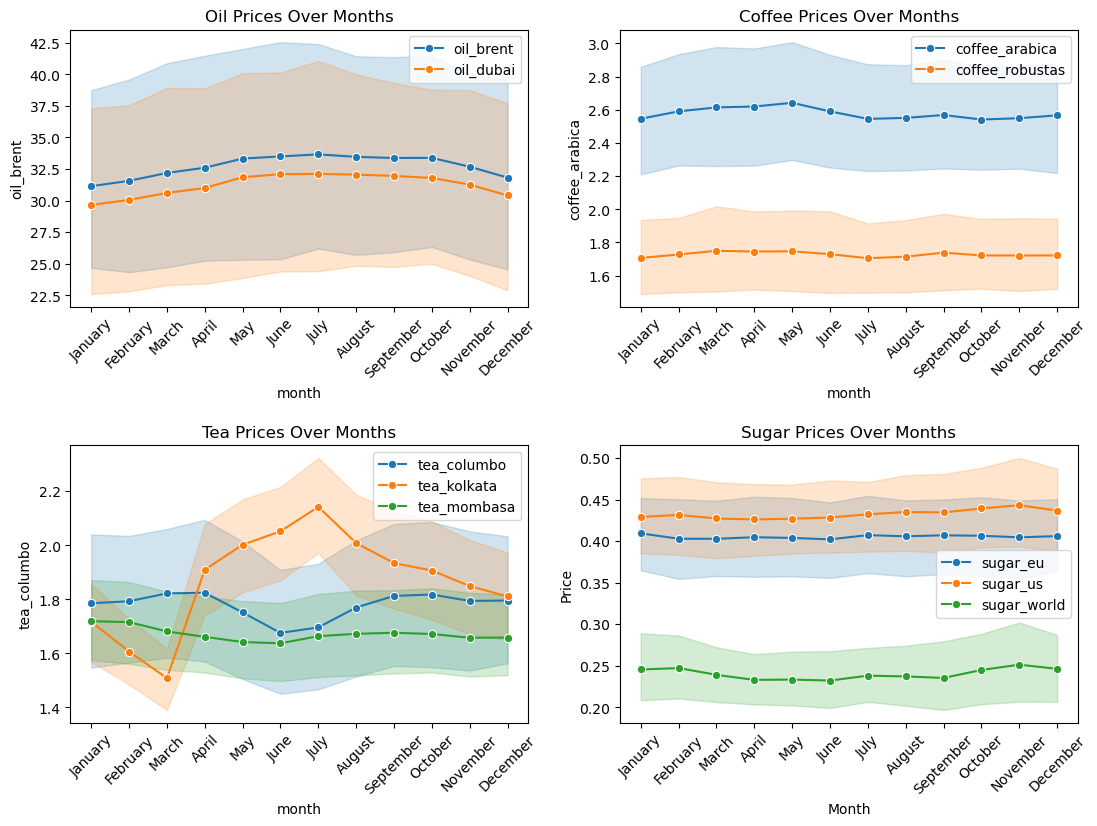

In [29]:
plt.figure(figsize=(13,9))
plt.subplot(2,2,1)
sns.lineplot(x='month',y='oil_brent',data=df, marker='o', label='oil_brent')
sns.lineplot(x='month',y='oil_dubai', data=df, marker='o', label='oil_dubai')
plt.title('Oil Prices Over Months')
plt.xticks(rotation=45)
plt.subplot(2,2,2)
sns.lineplot(x='month',y='coffee_arabica',data=df, marker='o', label='coffee_arabica')
sns.lineplot(x='month',y='coffee_robustas', data=df, marker='o', label='coffee_robustas')
plt.title('Coffee Prices Over Months')
plt.xticks(rotation=45)
plt.subplot(2,2,3)
sns.lineplot(x='month',y='tea_columbo', data=df, marker='o', label='tea_columbo')
sns.lineplot(x='month',y='tea_kolkata',data=df, marker='o', label='tea_kolkata')
sns.lineplot(x='month',y='tea_mombasa', data=df, marker='o', label='tea_mombasa')
plt.title('Tea Prices Over Months')
plt.xticks(rotation=45)
plt.subplot(2,2,4)
sns.lineplot(x='month',y='sugar_eu', data=df, marker='o', label='sugar_eu')
sns.lineplot(x='month',y='sugar_us',data=df, marker='o', label='sugar_us')
sns.lineplot(x='month',y='sugar_world', data=df, marker='o', label='sugar_world')
plt.title('Sugar Prices Over Months')
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0.5)
plt.legend()
plt.show()

#### Observation
- Now we can see the price which have more price period of months 
- But these price are different according the elements like coffee, tea, oil and sugar

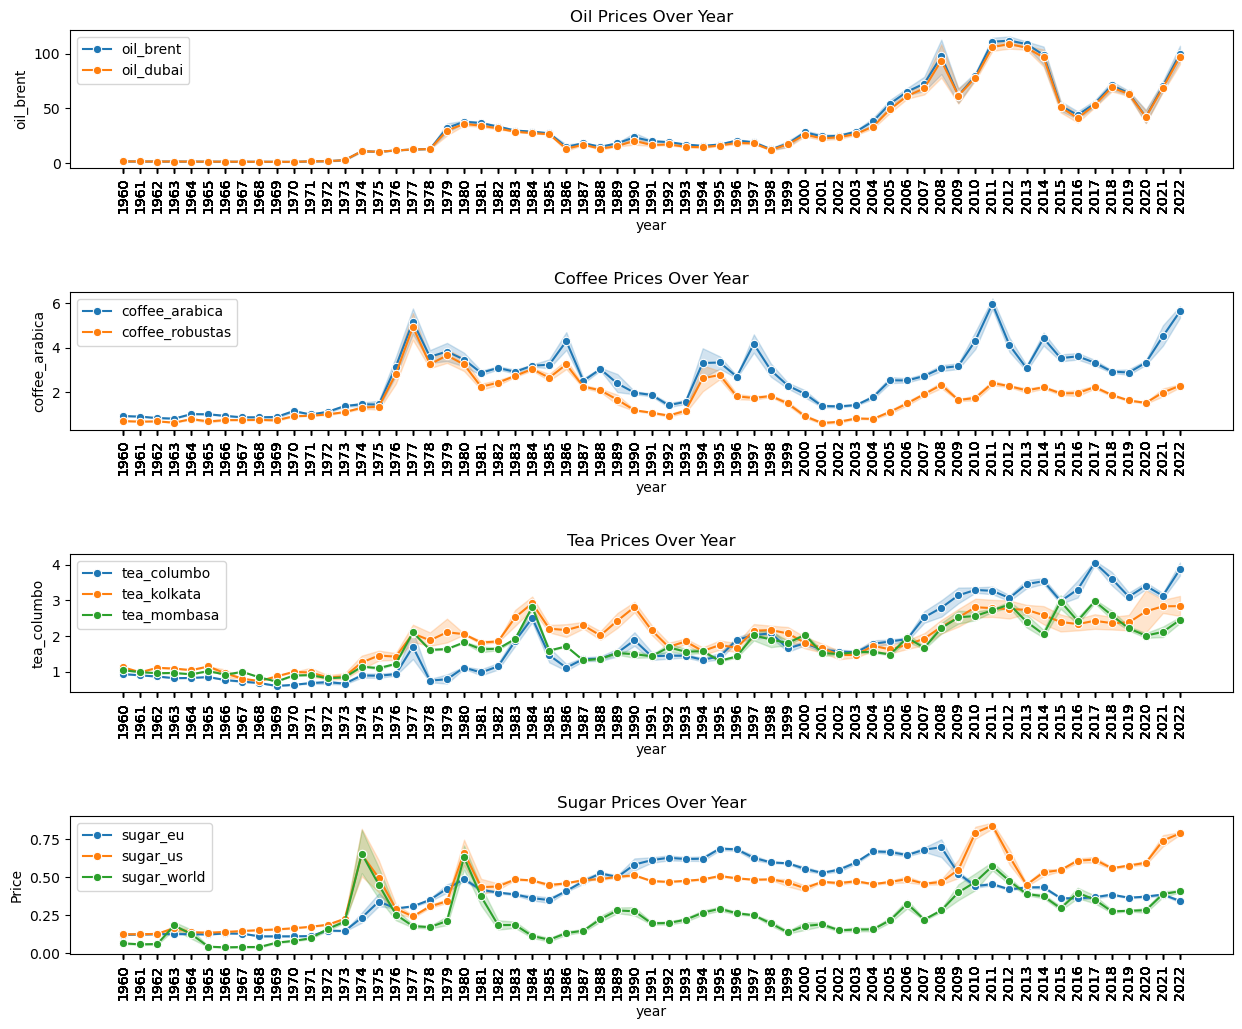

In [30]:
plt.figure(figsize=(15,12))
plt.subplot(4,1,1)
sns.lineplot(x='year',y='oil_brent',data=df, marker='o', label='oil_brent')
sns.lineplot(x='year',y='oil_dubai', data=df, marker='o', label='oil_dubai')
plt.title('Oil Prices Over Year')
plt.xticks(df['year'][::1],rotation=90)
plt.subplot(4,1,2)
sns.lineplot(x='year',y='coffee_arabica',data=df, marker='o', label='coffee_arabica')
sns.lineplot(x='year',y='coffee_robustas', data=df, marker='o', label='coffee_robustas')
plt.title('Coffee Prices Over Year')
plt.xticks(df['year'][::1],rotation=90)
plt.subplot(4,1,3)
sns.lineplot(x='year',y='tea_columbo', data=df, marker='o', label='tea_columbo')
sns.lineplot(x='year',y='tea_kolkata',data=df, marker='o', label='tea_kolkata')
sns.lineplot(x='year',y='tea_mombasa', data=df, marker='o', label='tea_mombasa')
plt.title('Tea Prices Over Year')
plt.xticks(df['year'][::1],rotation=90)
plt.subplot(4,1,4)
sns.lineplot(x='year',y='sugar_eu', data=df, marker='o', label='sugar_eu')
sns.lineplot(x='year',y='sugar_us',data=df, marker='o', label='sugar_us')
sns.lineplot(x='year',y='sugar_world', data=df, marker='o', label='sugar_world')
plt.title('Sugar Prices Over Year')
plt.xlabel('year')
plt.ylabel('Price')
plt.xticks(df['year'][::1],rotation=90)
plt.subplots_adjust(hspace=0.9)
plt.legend()
plt.show()

#### Observation
- here with the help of year we can check which product or element was growing period of year


### 8. How has brent oil prices vary on a quarterly basis since the last five year

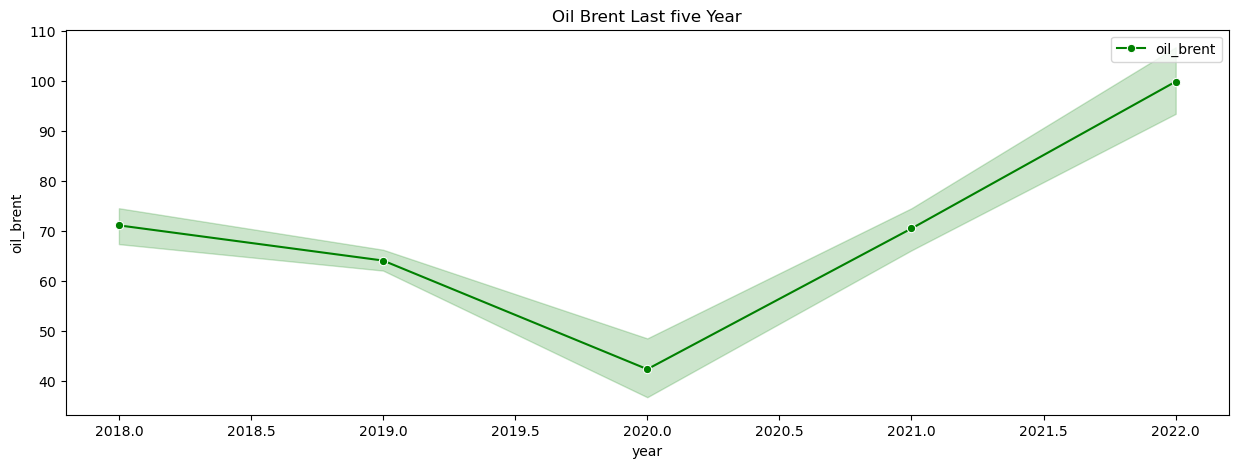

In [54]:
new_data = df[df['year']>=2018]
plt.figure(figsize=(15,5))
sns.lineplot(x='year', y='oil_brent', data=new_data, marker='o', label='oil_brent',color='green')
plt.title('Oil Brent Last five Year')
plt.show()

#### Observation
- As we can see that after 2018 oil_brent price decrease 
- Then 2020 again the price of oil_brent increase 

### 9.Is there a correlation between global sugar prices and the prices of EU sugar and US sugar?

<Axes: >

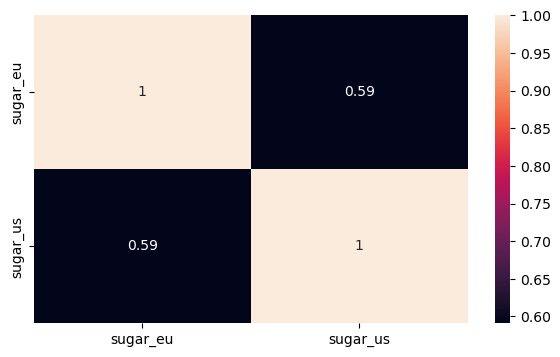

In [65]:
plt.figure(figsize=(7,4))
sns.heatmap(df[['sugar_eu','sugar_us']].corr(), annot=True)

#### Observation
- Here we can see cleary that sugar_eu and sugar_us have 50% co-relation 
- And self to self is showing 100% co-relation and 0.59 showing near 59% co-relation both columns

## 10. Is there a significant difference in the distribution of sugar prices between Europe (EU) a the United States (US)?

sugar_eu skewness:  -0.167659750431229
sugar_us skewness:  0.10340297222720043


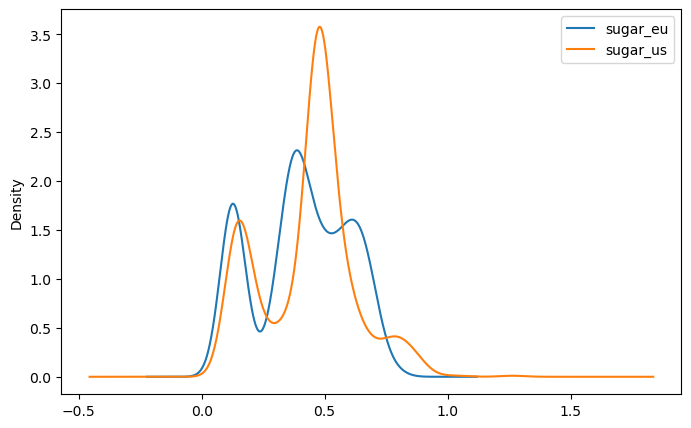

In [75]:
plt.figure(figsize=(8,5))
df['sugar_eu'].plot(kind='kde',label='sugar_eu')
df['sugar_us'].plot(kind='kde',label='sugar_us')
plt.legend()
print("sugar_eu skewness: ",df['sugar_eu'].skew())
print("sugar_us skewness: ",df['sugar_us'].skew())

#### Observation
- sugar_eu columns is near normalize but it is left distribution
- sugar_us  columns is near normalize but it is right distribution
- Values:
1. sugar_eu skewness:  0.167659750431229
2.  sugar_us skewness:  0.10340297222720043